In [106]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import (datasets, metrics,
                     model_selection as skms,
                     naive_bayes, neighbors)
test_data = pd.read_csv("test.csv")
test_data.head()

,left_vector,right_vector,Intoxication
0,11.011460,24.757951,0.0
1,11.306008,23.847561,1.0
2,11.306008,11.276217,NaN
3,11.306008,10.424521,NaN
4,29.563668,10.424521,NaN


Index(['left_vector', 'right_vector', 'Intoxication'], dtype='object')


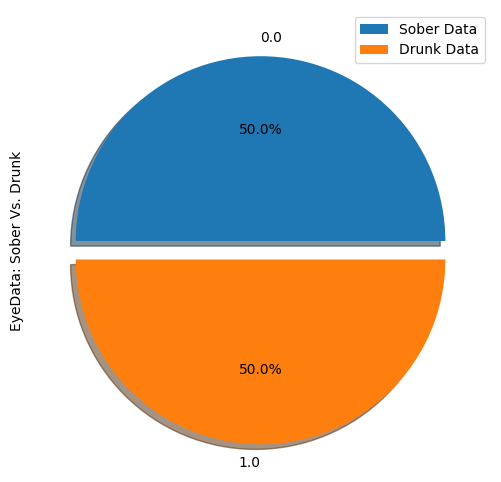

In [107]:
import matplotlib.pyplot as plt
# Helper function for data distribution
# Visualize the proportion of borrowers
print(test_data.columns)
def show_test_distrib(data):
  count = ""
  if isinstance(data, pd.DataFrame):
      count = data["Intoxication"].value_counts()
  else:
      count = data.value_counts()


  count.plot(kind = 'pie', explode = [0, 0.1], 

              figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
  plt.ylabel("EyeData: Sober Vs. Drunk")
  plt.legend(["Sober Data", "Drunk Data"])
  plt.show()


# Visualize the proportion of borrowers
show_test_distrib(test_data)

In [108]:

features = test_data[['left_vector', 'right_vector']]
target = test_data['Intoxication']

# Split the data into a training set and a test set
(train_ftrs, test_ftrs, train_tgt, test_tgt) = skms.train_test_split(features, target, test_size=.25)

# Display the first few rows of the test features and targets
test_data['Intoxication'] = test_data['Intoxication'].map({1: 'drunk', 0: 'sober'})
display(pd.concat([test_data.head(3),
                   test_data.tail(3)]))

,left_vector,right_vector,Intoxication
0,11.011460,24.757951,sober
1,11.306008,23.847561,drunk
2,11.306008,11.276217,NaN
2558,15.135502,13.725093,NaN
2559,15.135502,13.725093,NaN
2560,15.135502,13.725093,NaN


In [109]:
kNN_model = neighbors.KNeighborsClassifier(n_neighbors=3)
kNN_fit = kNN_model.fit(train_ftrs, train_tgt)
kNN_predictions = kNN_fit.predict(test_ftrs)
kNN_score = metrics.accuracy_score(test_tgt, kNN_predictions)
print(f'kNN model accuracy: {kNN_score:0.2f}')

ValueError: Input y contains NaN.

In [ ]:
new_data = pd.read_csv(r"C:\Users\rutge\OneDrive - University of Iowa\IOT\IOT Project\IOT Project git\HGN_Classification\Jake\eyeTracking\eyeCords.csv")

# Assuming new_data is a DataFrame containing the new samples to classify
new_features = new_data[['left_vector', 'right_vector']]
# Predict using the trained model
new_predictions = kNN_model.predict(new_features)

# Optionally, convert predictions back to readable labels if necessary
new_data['Intoxication_Prediction'] = new_predictions
new_data['Intoxication_Prediction'] = new_data['Intoxication_Prediction'].map({1: 'drunk', 0: 'sober'})

# Display the predictions
print(new_data[['left_vector', 'right_vector','Intoxication_Prediction']])

        x_value    y_value eye_side Intoxication_Prediction
0     48.685715  14.638095    right                   drunk
1     50.989742  19.074360    right                   drunk
2     52.863335  19.886667    right                   drunk
3     50.104652  21.182171    right                   drunk
4     49.116505  21.822006    right                   drunk
...         ...        ...      ...                     ...
2088  39.202381  11.102678    right                   sober
2089  31.721212  12.278788    right                   sober
2090  39.490105  11.223744     left                   sober
2091  39.490105  11.223744     left                   sober
2092  41.722961  11.133333     left                   sober

[2093 rows x 4 columns]


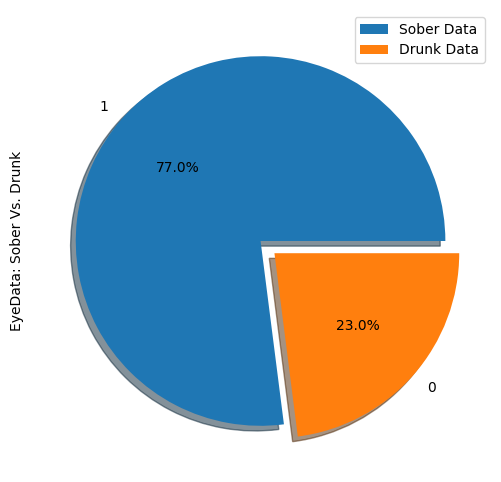

Overall classification: Sober


In [112]:
show_test_distrib(new_data)
def classify_person(predictions, threshold=0.5):
    # Calculate the percentage of predictions that are 'Intoxicated'
    percentage_intoxicated = np.mean(predictions == 1)  # assuming '1' stands for 'Intoxicated'
    
    # Compare against the threshold
    if percentage_intoxicated > threshold:
        return 'Drunk'
    else:
        return 'Sober'

# Example usage:
overall_classification = classify_person(new_data, threshold=0.5)
print(f'Overall classification: {overall_classification}')